In [4]:
import warnings
warnings.filterwarnings('ignore')
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

### Read measures

In [5]:
measures={}
for name in ['HINT','IntAct','Reactome','STRING']:
    measures[name]=pd.read_csv('3 - output/resume_'+name+'.tsv',sep='\t',index_col=0)

### Read gene list

In [6]:
file = open('4 - output/targetGenes.pickle', 'rb')
targetGenes=pickle.load(file)
file.close()

In [72]:
def getPercentilePositionByMeasure(geneList,measuresDF,measure):
    resume={}
    for name in measuresDF:
        resume[name]={}
        measureList = list(measuresDF[name].sort_values(by=measure,ascending=False)['nodeName'])
        for gene in geneList:
            try:
                resume[name][gene]=round(1-(measureList.index(gene)/len(measureList)),4)
            except ValueError:
                resume[name][gene]=np.nan
    return resume

def getGenePercentileSTD(gName):
    values=[]
    for _, valueDict in percentilePos.items():
        if not np.isnan(valueDict[gName]):
            values.append(valueDict[gName])
            
    return '('+str(round(np.std(values),2))+')' 

In [73]:
targetGenes['Famous']=targetGenes['Popular']

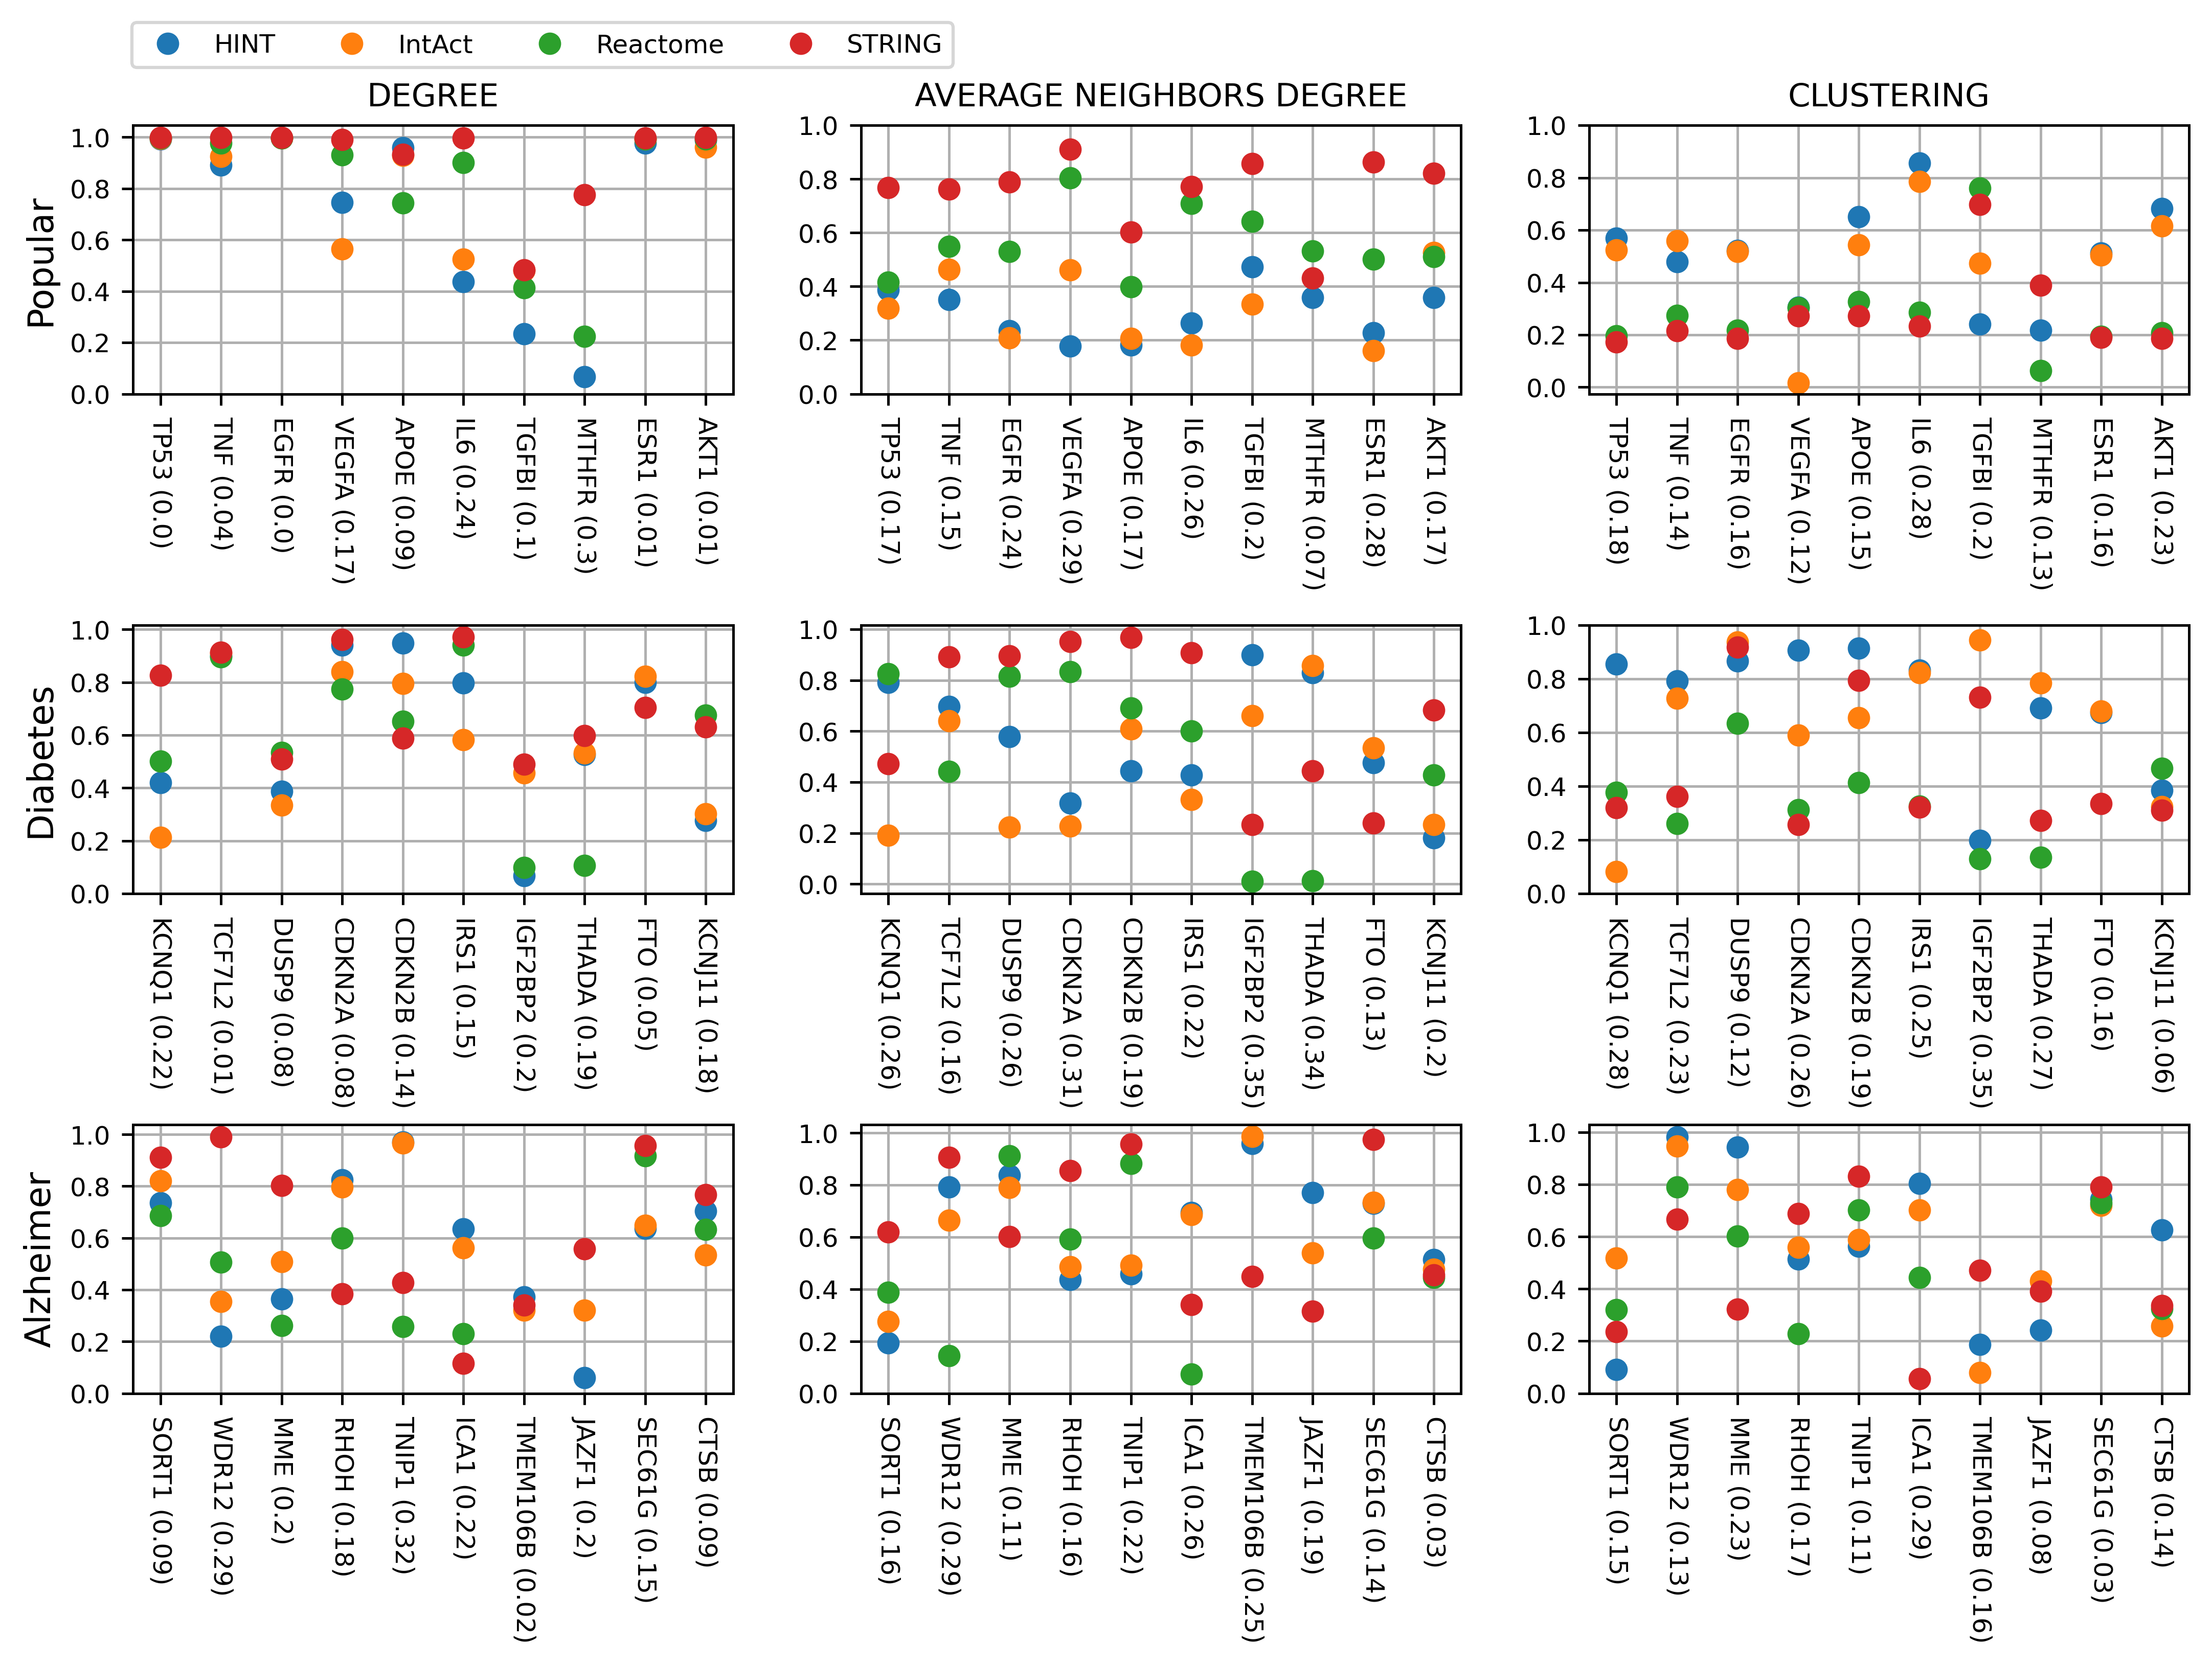

In [76]:
plt.figure(figsize=(10,6),dpi=450)
plotCont=1
for name in ['Popular','Diabetes','Alzheimer']:    
    for measure in ['Degree','AvgNeighbors','Clustering']: 
        plt.subplot(3,3,plotCont)
        plotCont=plotCont+1
        
        percentilePos = getPercentilePositionByMeasure(targetGenes[name][:10],measures,measure)
        for networkName in measures:
            x=percentilePos[networkName].keys()
            #update the x Axis with std info
            x = [name+' '+getGenePercentileSTD(name) for name in x]
            y=percentilePos[networkName].values()    
            plt.plot(x,y,'o',label=networkName)
            plt.tight_layout()
        plt.tight_layout()
        
        df=pd.DataFrame(percentilePos)
        df[name]=measure
        #display(df)
            
        plt.yticks(np.arange(0,1.1,0.2),fontsize=8)
        plt.xticks(rotation=-90,fontsize=8)
        if measure == 'Degree':
            plt.ylabel(name,fontsize=11)
        plt.grid()
        if(name == 'Popular'):
            if(measure=='AvgNeighbors'):
                measure='Average Neighbors Degree'
            plt.title(measure.upper(),fontsize=10)
            
    if(name == 'Popular'):
        plt.legend(bbox_to_anchor=(-2.45, 1.43), loc='upper left',ncol=4,fontsize=8,borderpad=0.4,labelspacing=0)

        
plt.tight_layout()
plt.savefig("5 - output/target genes.pdf", format='pdf', dpi=250,facecolor="white")
plt.show()